<a href="https://colab.research.google.com/github/jugal12345/AngryBirdsClone/blob/main/SIN_J_Comp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import re
from bs4 import BeautifulSoup
from tqdm import tqdm
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import stopwords
nltk.download('wordnet')
nltk.download('stopwords')
import re
from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer
import string

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,f1_score, confusion_matrix

import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas
import nlpaug.flow as nafc

from nlpaug.util import Action

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
pip install nlpaug

     |████████████████████████████████| 408 kB 5.0 MB/s 
     |████████████████████████████████| 11.3 MB 55.2 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.4 which is incompatible.


In [ ]:
df = pd.read_csv('/content/political_social_media.csv',encoding="ISO-8859-1")

In [ ]:
df.head()

,_trusted_judgments,audience,audience:confidence,bias,bias:confidence,message,message:confidence,source,text
0,1,1,1.0,1,1.0,1,1.0,0,RT @nowthisnews: Rep. Trey Radel (R- #FL) slam...
1,1,1,1.0,1,1.0,2,1.0,0,VIDEO - #Obamacare: Full of Higher Costs and ...
2,1,1,1.0,0,1.0,3,1.0,0,Please join me today in remembering our fallen...
3,1,1,1.0,0,1.0,1,1.0,0,RT @SenatorLeahy: 1st step toward Senate debat...
4,1,1,1.0,1,1.0,1,1.0,0,.@amazon delivery #drones show need to update ...


In [ ]:
df

,_trusted_judgments,audience,audience:confidence,bias,bias:confidence,message,message:confidence,source,text
0,1,1,1.0,1,1.0,1,1.0,0,RT @nowthisnews: Rep. Trey Radel (R- #FL) slam...
1,1,1,1.0,1,1.0,2,1.0,0,VIDEO - #Obamacare: Full of Higher Costs and ...
2,1,1,1.0,0,1.0,3,1.0,0,Please join me today in remembering our fallen...
3,1,1,1.0,0,1.0,1,1.0,0,RT @SenatorLeahy: 1st step toward Senate debat...
4,1,1,1.0,1,1.0,1,1.0,0,.@amazon delivery #drones show need to update ...
...,...,...,...,...,...,...,...,...,...
4995,1,1,1.0,1,1.0,3,1.0,1,I applaud Governor PerryÛªs recent decision t...
4996,1,1,1.0,1,1.0,1,1.0,1,"Today, I voted in favor of H.R. 5016 - Financi..."
4997,1,1,1.0,0,1.0,1,1.0,1,(Taken from posted WOKV interview) Congressm...
4998,1,1,1.0,0,1.0,8,1.0,1,Join me next week for a town hall in Ocala! I'...


In [ ]:
df.shape

(5000, 9)

In [ ]:
df.columns

Index(['_trusted_judgments', 'audience', 'audience:confidence', 'bias',
       'bias:confidence', 'message', 'message:confidence', 'source', 'text'],
      dtype='object')

In [ ]:
df.dtypes

_trusted_judgments       int64
audience                 int64
audience:confidence    float64
bias                     int64
bias:confidence        float64
message                  int64
message:confidence     float64
source                   int64
text                    object
dtype: object

In [ ]:
df_text_final=df['text']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2,f_classif, mutual_info_classif


vectorizer = TfidfVectorizer(min_df=3,analyzer='word',max_features=3000)
df_text=vectorizer.fit_transform(df_text_final)
print(df_text)

  (0, 563)	0.15342295814081838
  (0, 1344)	0.37698388198465016
  (0, 2031)	0.46060506139401586
  (0, 1853)	0.3044673590069145
  (0, 1088)	0.5473391608862196
  (0, 2236)	0.36841755250729313
  (0, 2309)	0.3068802752240335
  (1, 1343)	0.12118378144591152
  (1, 2106)	0.44572468201220594
  (1, 413)	0.4135549568954739
  (1, 210)	0.12952380554197554
  (1, 675)	0.36588024533906194
  (1, 1284)	0.3700624214457812
  (1, 1858)	0.126937618810559
  (1, 1142)	0.32809164376736016
  (1, 2834)	0.3378301166635448
  (1, 563)	0.1351047091104849
  (1, 1853)	0.2681148536747105
  (2, 2321)	0.30140492316534834
  (2, 2657)	0.15820987890894567
  (2, 1104)	0.09765154435755
  (2, 2406)	0.19731163470156696
  (2, 1730)	0.22334410206999084
  (2, 718)	0.2805441727533909
  (2, 2937)	0.20763815831393995
  :	:
  (4999, 2457)	0.21538624996653985
  (4999, 1446)	0.2519428244384493
  (4999, 1597)	0.2224176082527301
  (4999, 2836)	0.2244349063706591
  (4999, 811)	0.23400759294470655
  (4999, 595)	0.1568385325198735
  (4999, 1

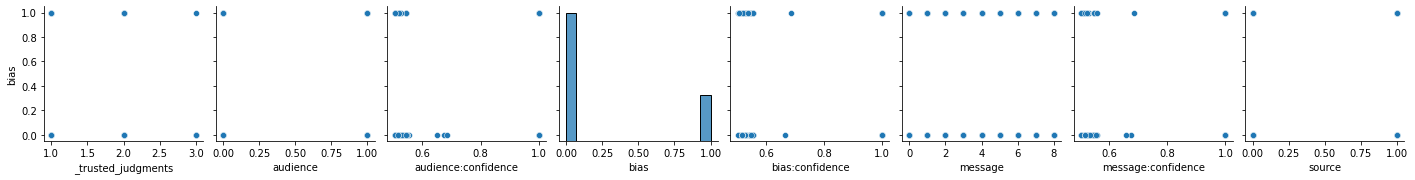

In [ ]:
sns.pairplot(df, y_vars=['bias'])

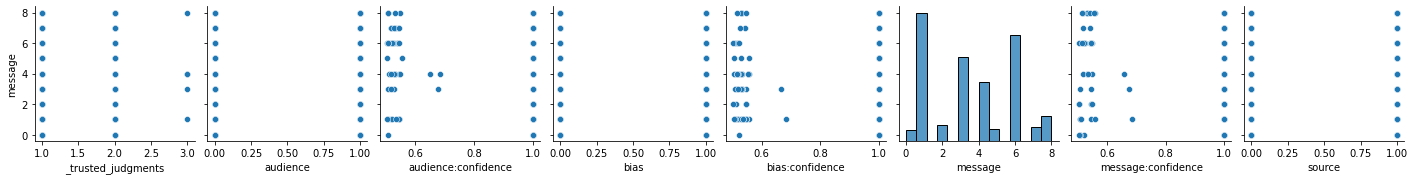

In [ ]:
sns.pairplot(df, y_vars=['message'])

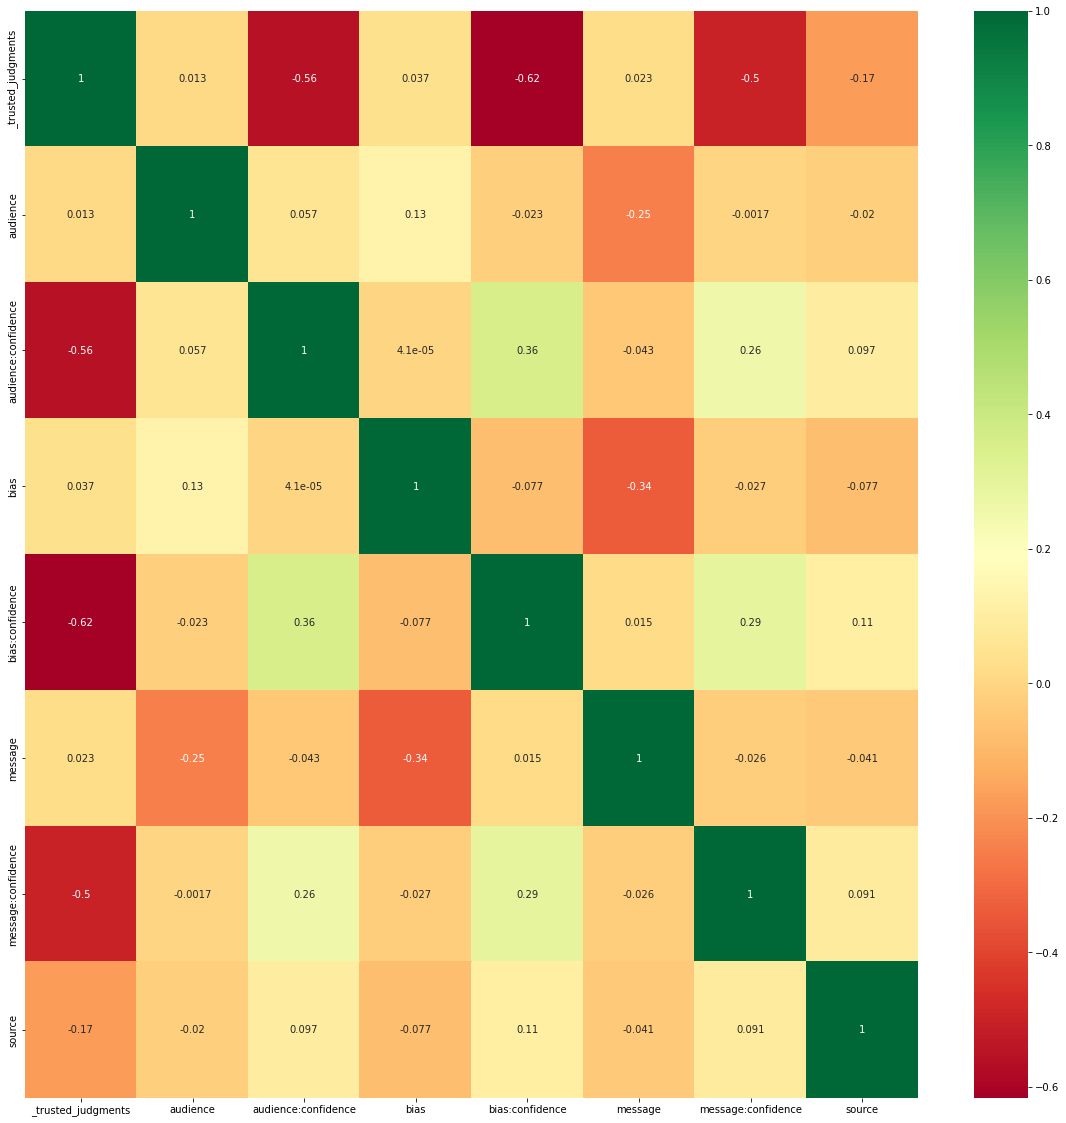

In [ ]:
%matplotlib inline
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
sns.heatmap(df[top_corr_features].corr(), annot=True, cmap='RdYlGn')

In [ ]:
corr_matrix=df.corr()
corr_matrix['bias'].sort_values(ascending=False)

bias                   1.000000
audience               0.126876
_trusted_judgments     0.037140
audience:confidence    0.000041
message:confidence    -0.026980
bias:confidence       -0.076507
source                -0.076848
message               -0.336590
Name: bias, dtype: float64

In [ ]:
corr_matrix['message'].sort_values(ascending=False)

message                1.000000
_trusted_judgments     0.022849
bias:confidence        0.015434
message:confidence    -0.026322
source                -0.041411
audience:confidence   -0.043444
audience              -0.246676
bias                  -0.336590
Name: message, dtype: float64

In [ ]:
print(df['text'])
X = df.iloc[:, [0,1,2,4,6,7]]
y = df.iloc[:, [5]].values
print(X)
print(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split((df_text),y,test_size=0.2, random_state = 42)

0       RT @nowthisnews: Rep. Trey Radel (R- #FL) slam...
1       VIDEO - #Obamacare:  Full of Higher Costs and ...
2       Please join me today in remembering our fallen...
3       RT @SenatorLeahy: 1st step toward Senate debat...
4       .@amazon delivery #drones show need to update ...
                              ...                        
4995    I applaud Governor PerryÛªs recent decision t...
4996    Today, I voted in favor of H.R. 5016 - Financi...
4997    (Taken from posted WOKV interview)   Congressm...
4998    Join me next week for a town hall in Ocala! I'...
4999    Foreign Affairs Committee Hearing on Syria. I ...
Name: text, Length: 5000, dtype: object
      _trusted_judgments  audience  ...  message:confidence  source
0                      1         1  ...                 1.0       0
1                      1         1  ...                 1.0       0
2                      1         1  ...                 1.0       0
3                      1         1  ...           

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


rf=RandomForestClassifier(n_estimators=10)
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [128],
    'max_features': [7],
    'min_samples_leaf': [8],
    'min_samples_split': [8],
    'n_estimators': [1000]
}

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = 4, verbose = 3)
grid_search.fit(X_train,y_train)
#print(grid_search.score(X_test,y_test))
rf.fit(X_train,y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


RandomForestClassifier(n_estimators=10)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_train_pred=rf.predict(X_train)



#print(classification_report(y_train,y_train_pred))
print(accuracy_score(y_train, y_train_pred))

0.98025


In [ ]:
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Activation, Dense



classifier = Sequential()
classifier.add(Dense(activation = "relu", input_dim = 3000, 
                     units = 8, kernel_initializer = "uniform"))
classifier.add(Dense(activation = "relu", units = 14, 
                     kernel_initializer = "uniform"))
classifier.add(Dense(activation = "sigmoid", units = 1, 
                     kernel_initializer = "uniform"))
classifier.compile(optimizer = 'adam' , loss = 'binary_crossentropy', 
                   metrics = ['accuracy'] )
classifier.fit(X_train , y_train , batch_size = 8 ,epochs = 150  )
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test,y_pred)
accuracy = (cm[0][0]+cm[1][1])/(cm[0][1] + cm[1][0] +cm[0][0] +cm[1][1])
print(accuracy)

Epoch 1/150
500/500 [==============================] - 2s 2ms/step - loss: -67.0004 - accuracy: 0.2900
Epoch 2/150
500/500 [==============================] - 1s 2ms/step - loss: -1115.2189 - accuracy: 0.2905
Epoch 3/150
500/500 [==============================] - 1s 2ms/step - loss: -4572.7959 - accuracy: 0.2905
Epoch 4/150
500/500 [==============================] - 1s 2ms/step - loss: -11344.8564 - accuracy: 0.2905
Epoch 5/150
500/500 [==============================] - 1s 2ms/step - loss: -22077.4414 - accuracy: 0.2905
Epoch 6/150
500/500 [==============================] - 1s 2ms/step - loss: -37092.1680 - accuracy: 0.2905
Epoch 7/150
500/500 [==============================] - 1s 2ms/step - loss: -56641.3320 - accuracy: 0.2905
Epoch 8/150
500/500 [==============================] - 1s 2ms/step - loss: -81133.2188 - accuracy: 0.2905
Epoch 9/150
500/500 [==============================] - 1s 2ms/step - loss: -110753.3203 - accuracy: 0.2905
Epoch 10/150
500/500 [============================